In [53]:
import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
import preprocessing 
import imp
imp.reload(preprocessing)
from preprocessing import preprocess_texts



data = pd.read_csv("../icnale_data/fake_data.csv")
preproc_data = data.text.apply(lambda x: pd.Series(preprocess_texts(x)))
preproc_data = preproc_data.fillna(0)
scaler = StandardScaler()
preproc_data = pd.DataFrame(scaler.fit_transform(preproc_data), columns=preproc_data.columns)
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(data.label)
preproc_data.mean()
preproc_data

,flesch_reading_ease,smog_index,flesch_kincaid_grade,coleman_liau_index,automated_readability_index,dale_chall_readability_score,difficult_words,linsear_write_formula,gunning_fog,text_standard
0,0.459302,-0.233252,-0.294126,-0.678164,-0.291874,-0.667462,-0.4375,0.072875,-0.124499,-0.410152
1,0.617171,-0.286264,-0.564242,-0.765974,-0.559921,-0.216764,0.8125,-0.571290,-0.450727,-0.410152
2,0.787857,-0.922405,-0.834357,-0.529562,-0.768402,-0.431382,1.1250,-0.838066,-0.943398,-0.751945
3,0.080149,-0.498311,-0.264113,0.058090,-0.351440,-0.656731,0.1875,-0.571290,-0.410781,-0.410152
4,-1.944479,1.940232,1.956838,1.915611,1.971636,1.972339,-1.6875,1.907771,1.929405,1.982399


In [54]:
preproc_data.mean()

flesch_reading_ease             3.552714e-16
smog_index                      1.776357e-16
flesch_kincaid_grade           -2.664535e-16
coleman_liau_index              3.552714e-16
automated_readability_index     2.220446e-16
dale_chall_readability_score    7.993606e-16
difficult_words                 4.440892e-16
linsear_write_formula           8.881784e-17
gunning_fog                     3.552714e-16
text_standard                   2.664535e-16
dtype: float64

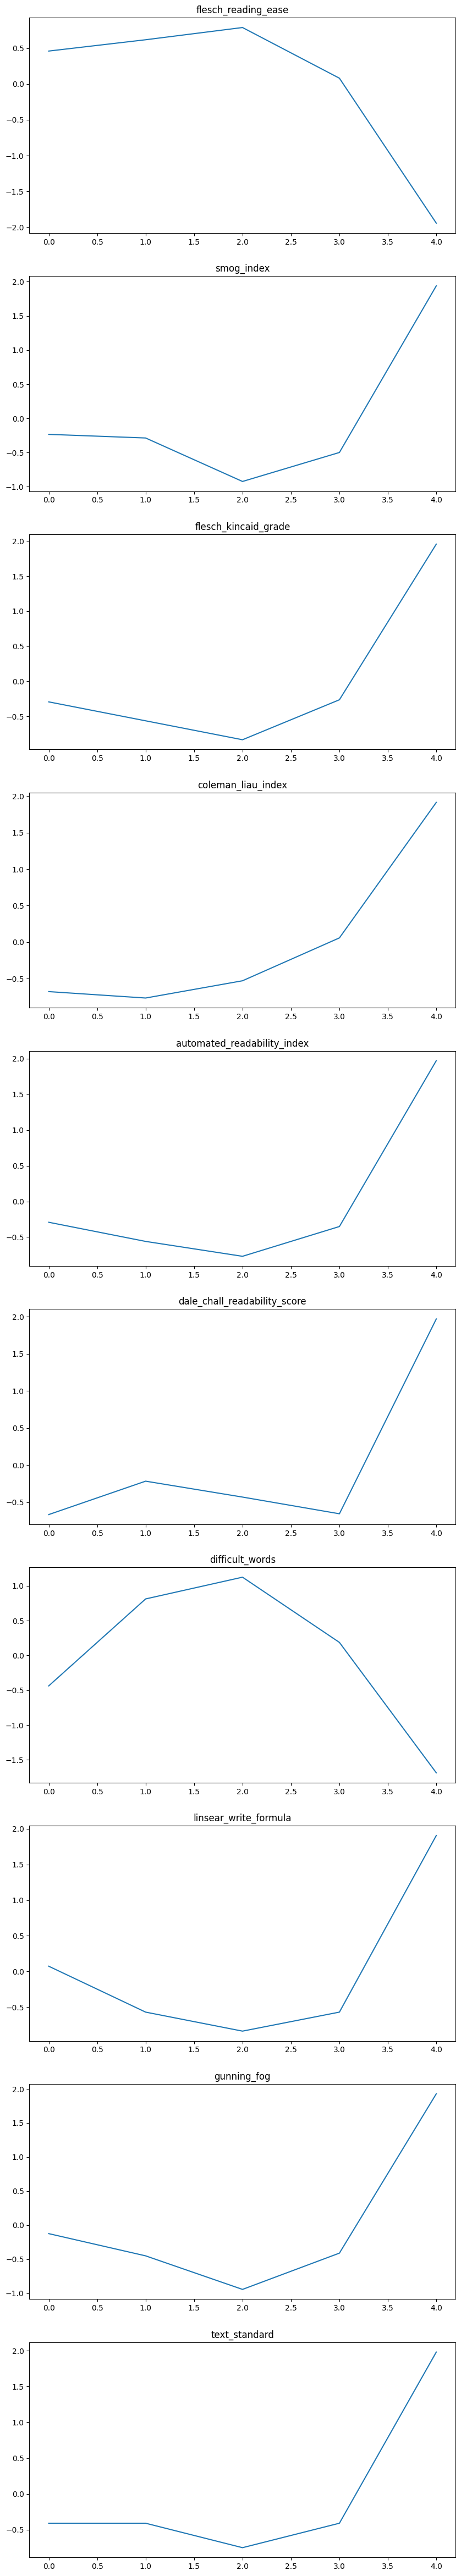

In [55]:
!pip install matplotlib
import matplotlib.pyplot as plt

mean_scores = {}
for column in preproc_data.columns:
    mean = preproc_data.groupby(by=["label"],level=0)[column].mean()
    mean_scores[column] = mean


fig, axs = plt.subplots(len(mean_scores))
fig.set_size_inches((10, 60))
for i, (title, data) in enumerate(mean_scores.items()):
    axs[i].plot(data.index, data.values)
    axs[i].set_title(title)


In [62]:
preproc_data.to_csv("data/CEFR/preprocessed_cefr_leveled_texts.csv", index=False)